<a href="https://colab.research.google.com/github/kshuravi/SQL_Covid_19_Report/blob/main/SQL_Covid_19_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sqlite3 as sql
conn = sql.connect('example.db')
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#Covid-19 Reporting

This project is based on the Toronto Covid-19 dataset, focusing on converting the dataframe to SQL table and do exploratory analysis by using SQL, Pandas, Seaborn and Matplotlib.

In [ ]:
url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/e5bf35bc-e681-43da-b2ce-0242d00922ad?format=csv'
df = pd.read_csv(url)

In [ ]:
df.to_sql('users', con=conn)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
pd.read_sql("SELECT * From users LIMIT 5", con=conn)

,index,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,0,2046144,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,1,2046145,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,2,2046146,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,3,2046147,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,4,2046148,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


In the cell below, select the 'Neighbourhood Name' column. 

In [ ]:
nbr = pd.read_sql("SELECT `Neighbourhood Name` From users", con=conn)
nbr.head()

,Neighbourhood Name
0,Willowdale East
1,Willowdale East
2,Parkwoods-Donalda
3,Church-Yonge Corridor
4,Church-Yonge Corridor


In [ ]:
cnt = pd.value_counts(nbr['Neighbourhood Name'], sort = True)
cnt10 = cnt[0:10]
cnt10

Woburn                               4551
Downsview-Roding-CFB                 4442
West Humber-Clairville               4018
Mount Olive-Silverstone-Jamestown    3969
Malvern                              3830
Rouge                                3704
Glenfield-Jane Heights               3644
York University Heights              3241
Black Creek                          2829
Westminster-Branson                  2595
Name: Neighbourhood Name, dtype: int64

Text(0, 0.5, 'Count')

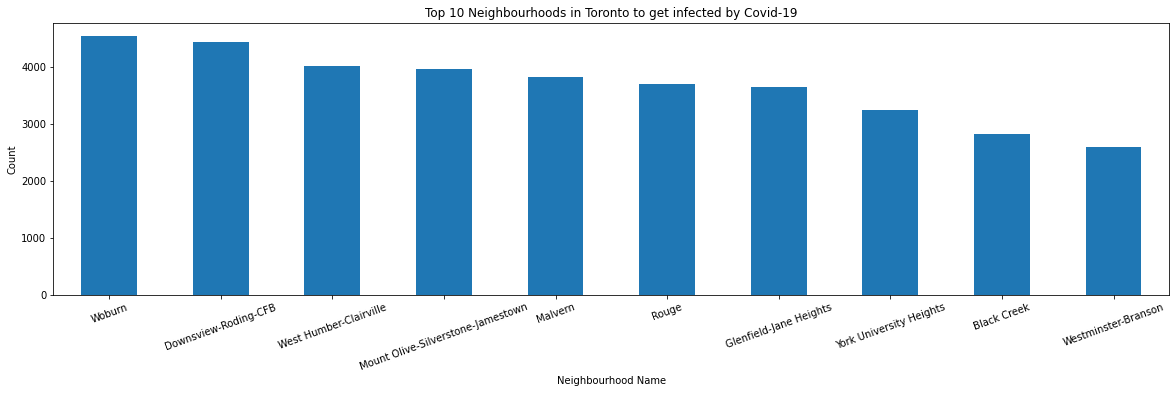

In [ ]:
cnt10.plot(kind = 'bar', rot=20, figsize=(20,5))
plt.title("Top 10 Neighbourhoods in Toronto to get infected by Covid-19")
plt.xlabel("Neighbourhood Name")
plt.ylabel("Count")

Use the groupby clause to group your entries in the data frame by Gender and query the **total count** of cases for each Gender. 


In [ ]:
pd.read_sql("SELECT `Client Gender`, COUNT(*) from users group by `Client Gender`", con=conn)

,Client Gender,COUNT(*)
0,FEMALE,82442
1,MALE,82000
2,NON-BINARY,21
3,"NOT LISTED, PLEASE SPECIFY",3
4,OTHER,23
5,TRANS MAN,3
6,TRANS WOMAN,2
7,TRANSGENDER,22
8,UNKNOWN,2597


Select the rows in the table where the infected patients were ever hospitalized

In [ ]:
hsp = pd.read_sql("SELECT * FROM users\
              WHERE `Ever Hospitalized` = 'Yes'", con=conn)
hsp.head()

,index,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,1,2046145,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
1,7,2046151,8,Sporadic,60 to 69 Years,Willowdale West,M2N,Travel,CONFIRMED,2020-02-21,2020-03-04,MALE,RESOLVED,No,No,No,Yes,No,No
2,17,2046161,19,Outbreak Associated,40 to 49 Years,Moss Park,M5A,"Outbreaks, Congregate Settings",CONFIRMED,2020-04-14,2020-03-06,MALE,RESOLVED,No,No,No,Yes,No,No
3,21,2046165,23,Sporadic,60 to 69 Years,Malvern,M1B,Travel,CONFIRMED,2020-03-04,2020-03-08,FEMALE,RESOLVED,No,No,No,Yes,Yes,Yes
4,34,2046178,38,Sporadic,19 and younger,Dovercourt-Wallace Emerson-Junction,M6H,Travel,CONFIRMED,2020-03-09,2020-03-11,FEMALE,RESOLVED,No,No,No,Yes,No,No


In [ ]:
gcnt = pd.value_counts(hsp['Client Gender'], sort = True)
# gcnt10 = cnt[0:10]
# gcnt10
gcnt

MALE          5815
FEMALE        4970
UNKNOWN         79
NON-BINARY       1
Name: Client Gender, dtype: int64

Text(0, 0.5, 'Count')

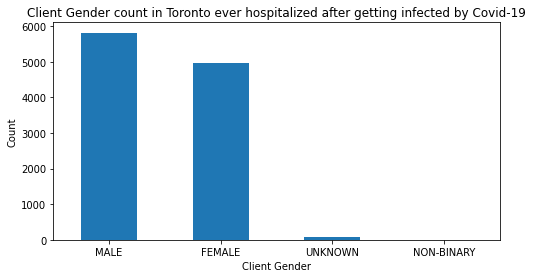

In [ ]:
gcnt.plot(kind = 'bar', rot=0, figsize=(8,4))
plt.title("Client Gender count in Toronto ever hospitalized after getting infected by Covid-19")
plt.xlabel("Client Gender")
plt.ylabel("Count")

Create a grouped bar chart showing the count of infections between male and female from month to month.

In [ ]:
df = pd.read_csv(url)
df.head()

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,2046144,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,2046145,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,2046146,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,2046147,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,2046148,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


In [ ]:
new = df.loc[(df['Client Gender'] == 'MALE') | (df['Client Gender'] =='FEMALE')]
new.head()

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,2046144,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,2046145,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,2046146,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,2046147,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,2046148,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


In [ ]:
Dates = pd.to_datetime(new['Episode Date'])
new['Dates'] = Dates
new["Month"] = new['Dates'].dt.month
new["Year"] = new['Dates'].dt.year

In [ ]:
new[['Client Gender','Month',	'Year']]

,Client Gender,Month,Year
0,FEMALE,1,2020
1,MALE,1,2020
2,FEMALE,2,2020
3,FEMALE,2,2020
4,MALE,2,2020
...,...,...,...
167108,MALE,5,2021
167109,MALE,5,2021
167110,MALE,5,2021
167111,MALE,5,2021


In [ ]:
# the total count of cases for Male and Female per month
YearMonth = new.groupby(['Year', 'Month','Client Gender'], as_index=False)
Counts = YearMonth['Client Gender'].agg(['count'])
print (Counts)

                          count
Year Month Client Gender       
2020 1     FEMALE             2
           MALE               2
     2     FEMALE             6
           MALE               9
     3     FEMALE           904
           MALE             884
     4     FEMALE          3150
           MALE            2322
     5     FEMALE          2421
           MALE            2257
     6     FEMALE          1144
           MALE            1038
     7     FEMALE           415
           MALE             429
     8     FEMALE           473
           MALE             387
     9     FEMALE          2533
           MALE            2606
     10    FEMALE          4439
           MALE            4295
     11    FEMALE          7413
           MALE            7456
     12    FEMALE         10976
           MALE           10693
2021 1     FEMALE         11254
           MALE           10965
     2     FEMALE          4736
           MALE            4968
     3     FEMALE          8832
        

In [ ]:
ap=pd.DataFrame(Counts)
api=ap.reset_index()

Text(0.5, 0.98, '\n Count of infections between Male and Female by Month to Month in 2020')

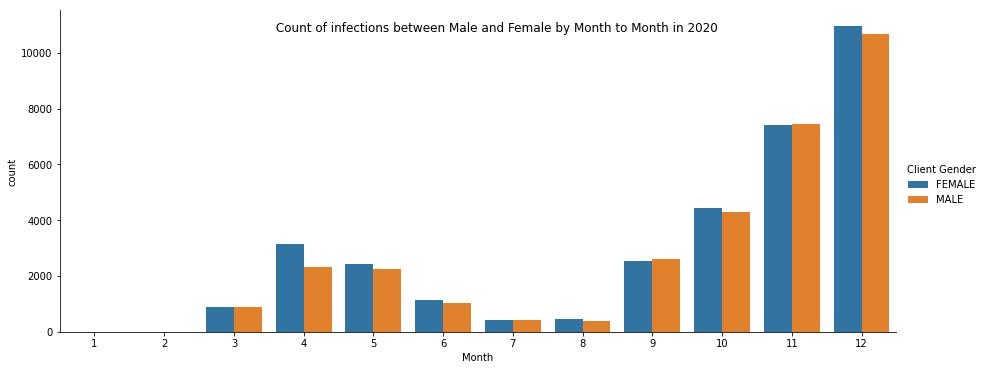

In [ ]:
ax = sns.catplot(data=api[0:24], kind="bar", x="Month", y='count', hue="Client Gender", height=5, aspect=2.5)
ax.fig.suptitle('\n Count of infections between Male and Female by Month to Month in 2020')

Text(0.5, 0.98, 'Count of infections between Male and Female by Month to Month in 2021')

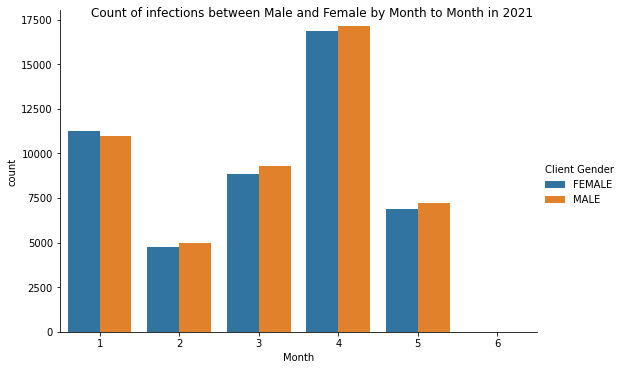

In [ ]:
ay= sns.catplot(data=api[24:], kind="bar", x="Month", y='count', hue="Client Gender", aspect=1.5)
ay.fig.suptitle('Count of infections between Male and Female by Month to Month in 2021')